In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('/home/jovyan/work')

In [11]:
import pandas as pd

# Compute First Protection Spells

In [14]:
from scripts.descriptive import compute_duration_dfs, compute_cdf_and_plot
from scripts.preprocessing import load_protections

In [339]:
df_all_spells = load_protections(spell_paths='data/protections/spells.csv.zip',
                                 exclude_moves_during_pp=False,
                                 exclude_subsequent=False, 
                                 exclude_indefinite=False, 
                                 exclude_ns=True, 
                                 exclude_ts_after=None,
                                 cutoff='2012-01-01')

All spells: 723640
Excluded already started protections: 694714
Exclude protections starting after 2012-01-01: 488772
Only edit spells: 299721
Only ns0: 215746
Excluded already started protections: 215746
Exclude protections starting after 2012-01-01: 215746


In [344]:
df_ns0_no_moved_noindef = load_protections(spell_paths='data/protections/spells.csv.zip',
                                 exclude_moves_during_pp=True,
                                 exclude_subsequent=False, 
                                 exclude_indefinite=True, 
                                 exclude_ns=True, 
                                 exclude_ts_after=None,
                                 cutoff='2012-01-01')

All spells: 723640
Only edit spells: 418219
Only ns0: 278833
Excluded already started protections: 277966
Exclude protections starting after 2012-01-01: 215746
Start prot from moved 1723
End prot from moved 901
In both  12
No Spells that were moved during protection: 213244
No start or end date: 196240


In [361]:
df_ns0_no_moved_indef = load_protections(spell_paths='data/protections/spells.csv.zip',
                                 exclude_moves_during_pp=True,
                                 exclude_subsequent=False, 
                                 exclude_indefinite=False, 
                                 exclude_ns=True, 
                                 exclude_ts_after=None,
                                 cutoff='2012-01-01')

All spells: 723640
Only edit spells: 418219
Only ns0: 278833
Excluded already started protections: 277966
Exclude protections starting after 2012-01-01: 215746
Start prot from moved 1723
End prot from moved 901
In both  12
No Spells that were moved during protection: 213244


In [360]:
df_indef = df_ns0_no_moved_indef[pd.isna(df_ns0_no_moved_indef.end)].copy()
df_indef.end.fillna('2023-03-01', inplace=True)

df_indef['duration'] = df_indef.end - df_indef.start


In [355]:
df_ns0_no_moved_noindef.title.value_counts()

DeMarcus_Cousins                  30
Turkey                            29
Cat_Creek,_Montana                28
Donald_Trump                      28
Newcastle_United_F.C.             25
                                  ..
Integralism                        1
Intact_dilation_and_extraction     1
Insyde_Software                    1
Insyde                             1
🍌                                  1
Name: title, Length: 104305, dtype: int64

In [372]:
df_spells = load_protections(spell_paths='data/protections/spells.csv.zip',
                             moves_file='data/supplementary/output-moves.tsv.zip', 
                             exclude_ts_after=None, 
                            cutoff='2012-01-01')

All spells: 723640
Only edit spells: 418219
Only ns0: 278833
Only first protections: 138270
Excluded already started protections: 138270
Exclude protections starting after 2012-01-01: 102563
Start prot from moved 258
End prot from moved 227
In both  12
No Spells that were moved during protection: 102100
No start or end date: 94298


In [176]:
df_spells.start = pd.to_datetime(df_spells.start, utc=True)
df_spells.start_day = pd.to_datetime(df_spells.start_day, utc=True)

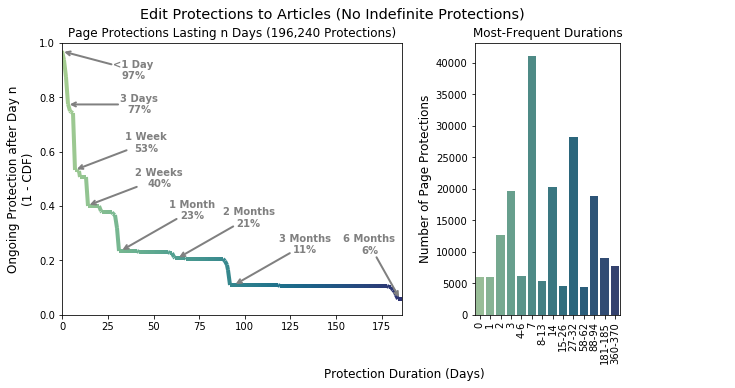

In [311]:
df_edit_spells_complete, df_prot_survival_complete = compute_duration_dfs(df_ns0_no_moved_no_indef)
df_hist = compute_cdf_and_plot(df_edit_spells_complete, title='Edit Protections to Articles (No Indefinite Protections)', exclude_infinity=True, filename='all_noindef')

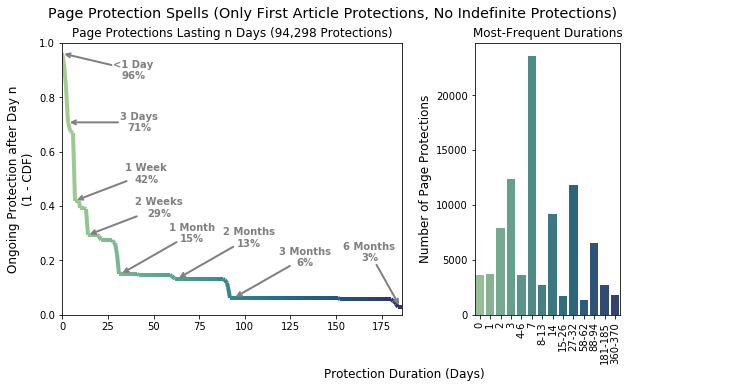

In [320]:
df_edit_spells_all, df_prot_survival_all = compute_duration_dfs(df_spells)
df_hist = compute_cdf_and_plot(df_edit_spells_all, title='Page Protection Spells (Only First Article Protections, No Indefinite Protections)', exclude_infinity=True, filename='first_noindef')

# Requests for Page Protections

In [144]:
from scripts.preprocessing import load_rfpp, filter_valid_rfpps
from scripts.descriptive import plot_rfpp

In [145]:
df_rfpp = load_rfpp(rfpp_path='data/requests/page_results.csv.zip')

Overall parsed 166227
Removed Unprotection requests (3000), remaining: 163227
Removed misused templates (195), remaining: 163032
Removed failed parsing (3095), remaining: 159937
Removed Comments, questions, or notes (2748), remaining: 157189
Removed non-articles (10089), remaining: 147100
Dropped duplicates 5571
141529 Requests for Protection with 147100 decisions (dropped 24698 requests)


In [150]:
df_rfpp_rel, df_rfpp_with_pending_changes = filter_valid_rfpps(df_rfpp.copy())


Remove requests (and decisions) for same article with duplicate request days AND decision days. 6794
Removed Move/Salt/Create requests (4255), remaining: 134892
(134892, 145941, 127098)
Removed Pending Changes requests (7794), remaining: 127098


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [382]:
print('Excluding pending changes')

pd.concat([df_rfpp_rel.Status.value_counts(),
    (df_rfpp_rel.Status.value_counts() / len(df_rfpp_rel))], axis=1)

Excluding pending changes


,Status,Status
Protected,83487,0.656871
Declined,25718,0.202348
UserIssue,8169,0.064273
Existing,8096,0.063699
Other,1628,0.012809


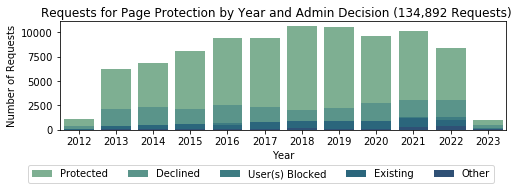

In [149]:
plot_rfpp(df_rfpp_with_pending_changes.copy(), filename=None)

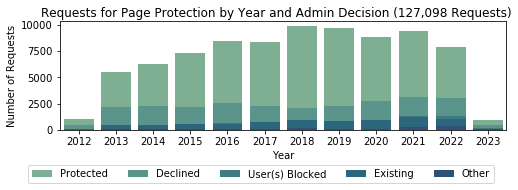

In [378]:
plot_rfpp(df_rfpp_rel.copy())

In [383]:
df_rfpp_rel.groupby(['norm_title', df_rfpp_rel.request_timestamp.dt.date]).size().sort_values()

norm_title               request_timestamp
"Hello,_World!"_program  2022-03-06           1
Nintendo_Direct          2020-03-10           1
Nintendo_DSi             2013-09-28           1
Nintendo_2DS             2013-08-29           1
Nintendo                 2014-08-18           1
                                             ..
Earth_Day                2013-04-25           2
John_Lennon              2014-03-23           2
MacKenzie_Bezos          2019-01-09           2
Emanuel_Moravec          2019-12-09           2
Braun_Strowman           2019-08-23           2
Length: 126888, dtype: int64

# Matching RfPP to PP

In [387]:
from scripts.preprocessing import merge_protected_to_accepted, build_treatment_and_control_groups

In [388]:
df_rfpp_inv = df_rfpp_rel[df_rfpp_rel.Status.isin(['Protected', 'Declined', 'UserIssue'])].copy()
df_rfpp_inv['request_timestamp_date'] = df_rfpp_inv.request_timestamp.dt.date

In [395]:
df_spells_rel = df_spells[(df_spells.start >= df_rfpp_rel.decision_ts.min())].copy()
print(len(df_spells_rel))

88239


In [390]:
# only consider requests that have not been protected before

df_all_spells_for_stats = df_all_spells[(df_all_spells.start >= df_rfpp_rel.decision_ts.min())].sort_values('start')

merge_column_rfpp = 'decision_ts'

df_rfpp_accepted = df_rfpp_rel.query("Status == 'Protected'").sort_values(merge_column_rfpp)
print(f'Protection spells: {len(df_rfpp_accepted)}')

# check if we can find spells for all requests and vice versa?
# note the "df_all_spells" here
print('====== Check if original spell dataset makes sense')
# to be fair, we have to exclude
merge_protected_to_accepted(df_all_spells_for_stats, df_rfpp_accepted)
# basically, the top number for how many enforced spells we find requests
# ... and the number below, for how many accepted requests we find enforced spells
print('#### the "spells to accepted requests" should be very high')

df_spells_to_rfpp, df_rfpp_to_spells, df_dropped_spells, df_dropped_rfpp = merge_protected_to_accepted(df_spells_rel, df_rfpp_accepted)
# these numbers tell us that 32% of requests are for first protections. which checks out, as basically a third of spells is enforced as first protections

Protection spells: 83487
====== Check if original spell dataset makes sense
Matched 40.23% of spells to accepted requests(81644/202923)
Matched 96.85% of accepted requests to spells(80857/83487)
#### the "spells to accepted requests" should be very high
Matched 38.99% of spells to accepted requests(34401/88239)
Matched 41.24% of accepted requests to spells(34426/83487)


In [399]:
# now, build actual treatment and control groups
df_spell_protected, df_rfpp_accepted, df_rfpp_declined, df_rfpp_userint = build_treatment_and_control_groups(df_rfpp_rel, df_rfpp_to_spells, df_dropped_spells)

In [397]:
# declined pages not protected within 90 days after. 

FIRST protections that were requested by users and enforced: 34426
FIRST protections enforced WITHOUT user request: 53838
Protections that were requested by users and declined: 25718
==> First Protections that were requested by users and declined: 14275


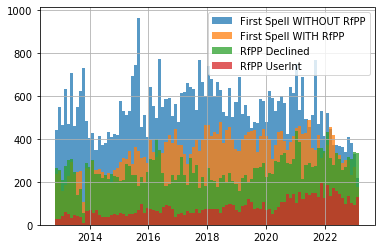

In [200]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_spell_protected.start.dt.date.hist(bins=100, ax=ax, label='First Spell WITHOUT RfPP', alpha=0.75) # first protections
df_rfpp_accepted.request_timestamp.dt.date.hist(bins=100, ax=ax, label='First Spell WITH RfPP', alpha=0.75)
df_rfpp_declined.request_timestamp.dt.date.hist(bins=100, ax=ax, label='RfPP Declined', alpha=0.75)
#df_rfpp_declined_np.request_timestamp.dt.date.hist(bins=100, ax=ax, label='First Spell Declined in RfPP', alpha=0.75)
df_rfpp_userint.request_timestamp.dt.date.hist(bins=100, ax=ax, label='RfPP UserInt', alpha=0.75)
#df_rfpp_userint_np.request_timestamp.dt.date.hist(bins=100, ax=ax, label='First UserInt in RfPP', alpha=0.75)
ax.legend()
print(f'FIRST protections that were requested by users and enforced: {len(df_rfpp_accepted)}')
print(f'FIRST protections enforced WITHOUT user request: {len(df_spell_protected)}')

# this is not only first protections!!!! double check here
print(f'Protections that were requested by users and declined: {len(df_rfpp_declined)}')
print(f'==> First Protections that were requested by users and declined: {len(df_rfpp_declined_np)}')

In [202]:
df_matched_rfpp_firstprot = pd.concat([df_spell_protected, df_rfpp_accepted, df_rfpp_declined_np, df_rfpp_userint_np]).reset_index(drop=True)
df_matched_rfpp_firstprot['treated_id'] = df_matched_rfpp_firstprot.index.values
df_matched_rfpp_firstprot.to_csv('data/experiment-writing/df_candidate_articles.csv', index=False)

In [401]:
df_matched_rfpp_firstprot

,norm_title,level,start,end,type,request_timestamp,decision_ts,treated_id
0,Little_Things_(One_Direction_song),autoconfirmed,2012-10-29 08:23:13+00:00,2012-11-01 08:23:00+00:00,spell-not-requested,NaT,NaT,0
1,Live_While_We're_Young,autoconfirmed,2012-10-29 08:24:01+00:00,2012-11-01 08:24:00+00:00,spell-not-requested,NaT,NaT,1
2,Kaduthuruthy_Valiya_Palli,autoconfirmed,2012-10-29 08:59:24+00:00,2013-01-29 08:59:00+00:00,spell-not-requested,NaT,NaT,2
3,Quantum_chemistry,autoconfirmed,2012-10-29 13:07:17+00:00,2012-11-01 13:07:00+00:00,spell-not-requested,NaT,NaT,3
4,Tobuscus,sysop,2012-10-29 14:21:20+00:00,2012-11-03 08:26:03+00:00,spell-not-requested,NaT,NaT,4
...,...,...,...,...,...,...,...,...
107114,Liberal_Judaism,NaN,NaT,NaT,rfpp-userint,2012-11-10 13:51:00+00:00,2012-11-11 02:22:00+00:00,107114
107115,History_of_Armenia,NaN,NaT,NaT,rfpp-userint,2012-11-09 21:17:00+00:00,2012-11-10 11:29:00+00:00,107115
107116,Steamboats_of_the_Mississippi,NaN,NaT,NaT,rfpp-userint,2012-11-08 17:07:00+00:00,2012-11-08 18:55:00+00:00,107116
107117,MGM-52_Lance,NaN,NaT,NaT,rfpp-userint,2012-11-06 14:30:00+00:00,2012-11-06 15:04:00+00:00,107117


In [268]:
df_matched_rfpp_firstprot.to_csv('data/experiment-writing/df_candidate_articles.csv', index=False)

In [228]:
df_matched_rfpp_firstprot[df_matched_rfpp_firstprot.norm_title == ('Bad_Girls_Club_(season_1)')]

,norm_title,level,start,end,type,request_timestamp,decision_ts,treated_id
3325,Bad_Girls_Club_(season_1),autoconfirmed,2013-06-17 21:59:07+00:00,2013-07-08 21:59:00+00:00,spell-not-requested,NaT,NaT,3325
101825,Bad_Girls_Club_(season_1),NaN,NaT,NaT,rfpp-declined,2013-04-10 16:04:00+00:00,2013-04-10 17:23:00+00:00,101825
101884,Bad_Girls_Club_(season_1),NaN,NaT,NaT,rfpp-declined,2013-04-01 23:28:00+00:00,2013-04-02 11:30:00+00:00,101884
102005,Bad_Girls_Club_(season_1),NaN,NaT,NaT,rfpp-declined,2013-03-08 19:59:00+00:00,2013-03-08 22:49:00+00:00,102005
102184,Bad_Girls_Club_(season_1),NaN,NaT,NaT,rfpp-declined,2013-01-19 21:42:00+00:00,2013-01-19 22:40:00+00:00,102184
102373,Bad_Girls_Club_(season_1),NaN,NaT,NaT,rfpp-declined,2012-12-04 23:48:00+00:00,2012-12-05 18:53:00+00:00,102373
102418,Bad_Girls_Club_(season_1),NaN,NaT,NaT,rfpp-declined,2012-11-25 14:21:00+00:00,2012-11-25 19:24:00+00:00,102418
102430,Bad_Girls_Club_(season_1),NaN,NaT,NaT,rfpp-declined,2012-11-22 13:44:00+00:00,2012-11-22 15:58:00+00:00,102430


# Now, start preparing data by removing possible overlapping periods.
... chose 90 days as "forgetting" a previous intervention existed, but still consider our predicate of not having previously protected pages!

In [210]:
from scripts.preprocessing import filter_treatment_and_control_for_experiment

In [255]:
df_experimental_groups = filter_treatment_and_control_for_experiment(df_matched_rfpp_firstprot, df_all_spells)

No Spells that had another intervention within 90D: 102843 (dropped 4276)
Removed 3647 first spells < 1 Day of duration.


In [272]:
df_experimental_groups.to_csv('data/experiment-writing/df_experiment_articles.csv', index=False)

In [267]:
df_experimental_groups[df_experimental_groups.norm_title == 'Nita_Ambani']

,norm_title,level,start,end,type,request_timestamp,decision_ts,treated_id,threshold_end_timestamp,threshold_start_timestamp,duration
56413,Nita_Ambani,autoconfirmed,2020-03-07 13:23:58+00:00,2020-06-07 13:23:00+00:00,spell-not-requested,NaT,NaT,39650,2020-06-07 13:23:00+00:00,2020-03-07 13:23:58+00:00,91 days 23:59:02
9634,Nita_Ambani,NaN,NaT,NaT,rfpp-declined,2017-09-06 11:29:00+00:00,2017-09-06 13:32:00+00:00,95935,2017-09-06 11:29:00+00:00,2017-09-06 11:29:00+00:00,NaT
9635,Nita_Ambani,NaN,NaT,NaT,rfpp-declined,2018-08-23 06:46:00+00:00,2018-08-23 08:29:00+00:00,94911,2018-08-23 06:46:00+00:00,2018-08-23 06:46:00+00:00,NaT
9636,Nita_Ambani,NaN,NaT,NaT,rfpp-declined,2019-03-29 09:49:00+00:00,2019-03-29 10:12:00+00:00,94235,2019-03-29 09:49:00+00:00,2019-03-29 09:49:00+00:00,NaT


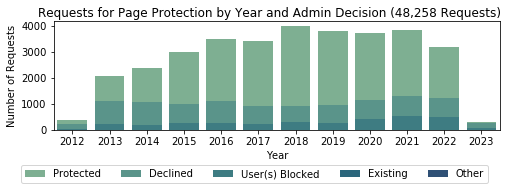

In [281]:
plot_rfpp(df_experimental_groups.dropna(subset=['Status']).copy())

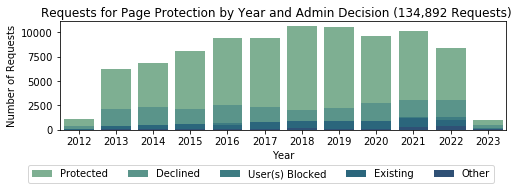

In [279]:
plot_rfpp(df_rfpp_with_pending_changes.dropna(subset=['Status']))